In [55]:
import pandas as pd
from fastai.vision.all import *
from pathlib import Path
from scipy import io
from torchvision.models import resnet50, ResNet50_Weights

In [56]:
# Source: https://www.kaggle.com/datasets/hobaak/oxford-102-flower-name-index
# Generating a dictionary of flower names based on the label numbers given in imagelabels.mat
flowers_name=pd.read_csv('Oxford-102_Flower_dataset_labels.txt', names=['name'])
flowers_name['name'] = flowers_name['name'].str[2:-1]
flowers_name.index = pd.Index(range(1, 1 + len(flowers_name)))
flowers_name.head(10)
name_dict = flowers_name.to_dict()['name']

In [57]:
mat = io.loadmat('imagelabels.mat')
labels_list = [[f'image_{str(idx).rjust(5, "0")}', name_dict[x]] for idx,x in enumerate(mat["labels"][0],1)]
data = pd.DataFrame(labels_list, columns=['file', 'flower'])
data.tail()

,file,flower
8184,image_08185,japanese anemone
8185,image_08186,japanese anemone
8186,image_08187,japanese anemone
8187,image_08188,japanese anemone
8188,image_08189,japanese anemone


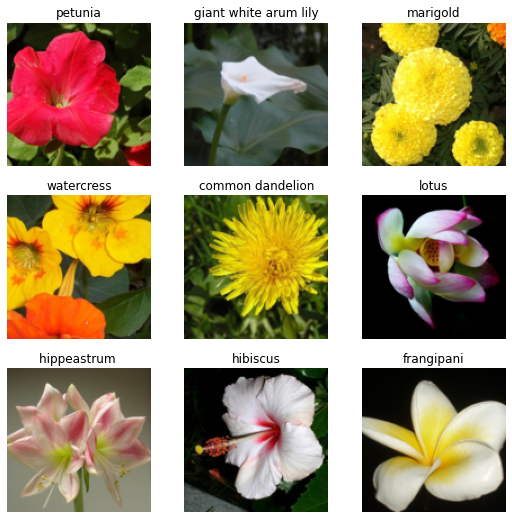

In [58]:
flowers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_x=ColReader(0, pref=f'/home/jab/fastbook/flowers/jpg/', suff='.jpg'), 
    get_y=ColReader(1)
    ,item_tfms=Resize(128)
)
dls = flowers.dataloaders(data)
dls.show_batch()

epoch,train_loss,valid_loss,error_rate,time
0,2.245062,0.807605,0.213195,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.694582,0.419787,0.107514,00:19
1,0.388995,0.362900,0.099572,00:19
2,0.253446,0.320308,0.088577,00:19
3,0.145668,0.262602,0.072083,00:22
4,0.090469,0.280807,0.072694,00:21
5,0.063971,0.228718,0.056811,00:21
6,0.034501,0.211197,0.054368,00:21
7,0.019674,0.168208,0.047648,00:22
8,0.011051,0.160288,0.044594,00:22
9,0.010284,0.162939,0.043372,00:21


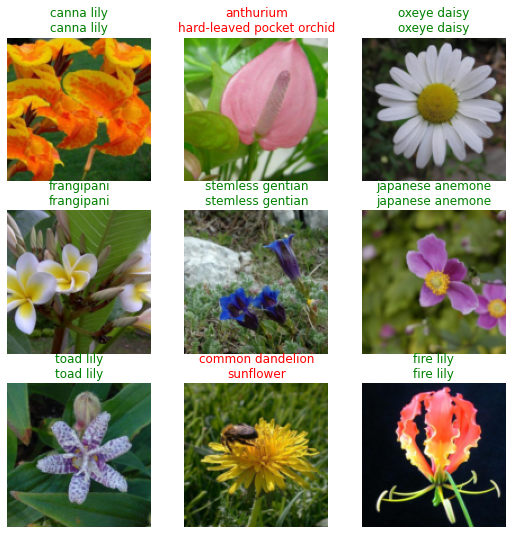

In [64]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(10)
learn.show_results()